In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
from datetime import datetime

def parse_date(date_str):
    for fmt in ('%d-%m-%Y', '%m/%d/%Y'):
        try:
            return datetime.strptime(date_str, fmt)
        except ValueError:
            continue
    return pd.NaT

In [2]:
file_path = 'Python-Corona (5) (2).csv'
df = pd.read_csv(file_path)


In [3]:
df.isnull().sum()

UserName            0
ScreenName          0
Location         8590
TweetAt             0
OriginalTweet       0
Sentiment           0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41156 entries, 0 to 41155
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   UserName       41156 non-null  int64 
 1   ScreenName     41156 non-null  int64 
 2   Location       32566 non-null  object
 3   TweetAt        41156 non-null  object
 4   OriginalTweet  41156 non-null  object
 5   Sentiment      41156 non-null  object
dtypes: int64(2), object(4)
memory usage: 1.9+ MB


In [7]:
df.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative


In [ ]:
# Convert 'TweetAt' to datetime format
data['TweetAt'] = pd.to_datetime(data['TweetAt'], format='%d-%m-%Y')

# Check unique values in the 'Sentiment' column
unique_sentiments = data['Sentiment'].unique()

# Check missing values in 'Location' and how many rows are affected
missing_location = data['Location'].isna().sum()

# Fill missing 'Location' with a placeholder 'Unknown'
data['Location'].fillna('Unknown', inplace=True)

# Display the updated information about missing values and unique sentiments
updated_info = data.info()
updated_head = data.head()

missing_location, unique_sentiments, updated_info, updated_head


In [8]:
df['Location'].fillna('Unknown', inplace=True)

In [9]:
df.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive
3,3802,48754,Unknown,16-03-2020,My food stock is not the only one which is emp...,Positive
4,3803,48755,Unknown,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative


In [10]:
df['TweetAt'].isna().sum()

0

In [15]:
df['Sentiment'].unique()

array(['Neutral', 'Positive', 'Extremely Negative', 'Negative',
       'Extremely Positive'], dtype=object)

In [19]:
# df['TweetAt'] = pd.to_datetime(df['TweetAt'], format='%d-%m-%Y')
df['TweetAt'] = df['TweetAt'].apply(parse_date)

In [20]:
df['TweetAt'].isna().sum()

0

In [21]:
df.info()   #changed "TweetAt" column from object to datetime

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41156 entries, 0 to 41155
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   UserName       41156 non-null  int64         
 1   ScreenName     41156 non-null  int64         
 2   Location       41156 non-null  object        
 3   TweetAt        41156 non-null  datetime64[ns]
 4   OriginalTweet  41156 non-null  object        
 5   Sentiment      41156 non-null  object        
dtypes: datetime64[ns](1), int64(2), object(3)
memory usage: 1.9+ MB


In [22]:
df['Sentiment'].unique()

array(['Neutral', 'Positive', 'Extremely Negative', 'Negative',
       'Extremely Positive'], dtype=object)

In [28]:
df['Sentiment'].value_counts()

Sentiment
Positive              11422
Negative               9916
Neutral                7713
Extremely Positive     6624
Extremely Negative     5481
Name: count, dtype: int64

# visual representation

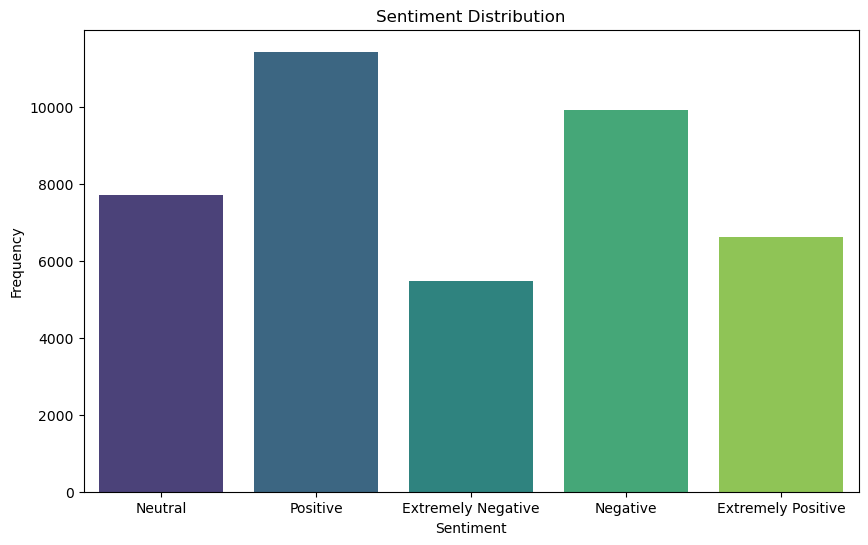

In [59]:
# sentiment distribution using BAR PLOT
plt.figure(figsize=(10, 6))
sns.countplot(x='Sentiment', data=df, palette="viridis")
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Frequency')
plt.show()

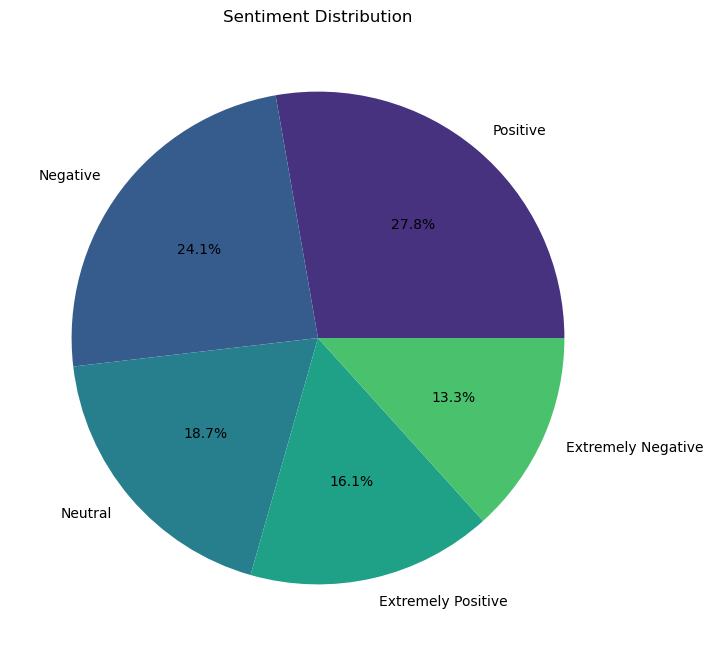

In [57]:
# sentiment distribution using PIE CHART
df['Sentiment'].value_counts().plot.pie(autopct='%1.1f%%', figsize=(8, 8), colors=sns.color_palette('viridis'))
plt.title('Sentiment Distribution')
plt.ylabel('')
plt.show()

In [40]:
#  how sentiments change over time
sentiment_time_series = df.groupby([df['TweetAt'].dt.date, 'Sentiment']).size().unstack().fillna(0)

sentiment_time_series

Sentiment,Extremely Negative,Extremely Positive,Negative,Neutral,Positive
TweetAt,,,,,
2020-01-04,90,89,156,125,170
2020-02-04,119,141,242,201,251
2020-03-04,103,117,208,154,228
2020-03-16,98,99,164,108,186
2020-03-17,304,286,518,361,508
2020-03-18,433,408,674,486,741
2020-03-19,489,482,810,571,863
2020-03-20,594,478,869,597,910
2020-03-21,372,426,689,456,710


<Figure size 1400x800 with 0 Axes>

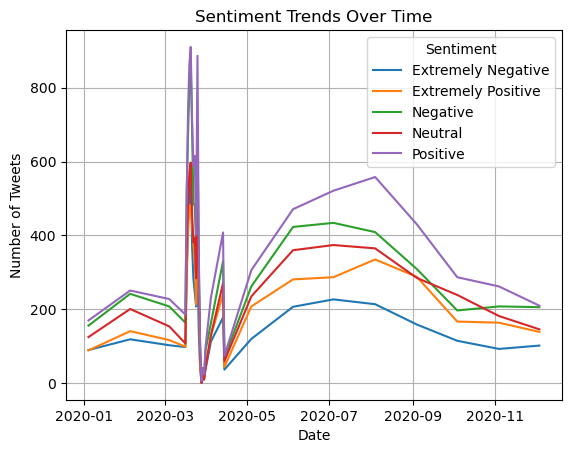

In [41]:
# Time Series Plot
plt.figure(figsize=(14, 8))
sentiment_time_series.plot()
plt.title('Sentiment Trends Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Tweets')
plt.legend(title='Sentiment')
plt.grid(True)
plt.show()

In [48]:
# Top 10 Locations with the Most Tweets
top_locations = df['Location'].value_counts().head(10).index
top_location_data = df[df['Location'].isin(top_locations)]
# print(top_locations)
# print(top_location_data)

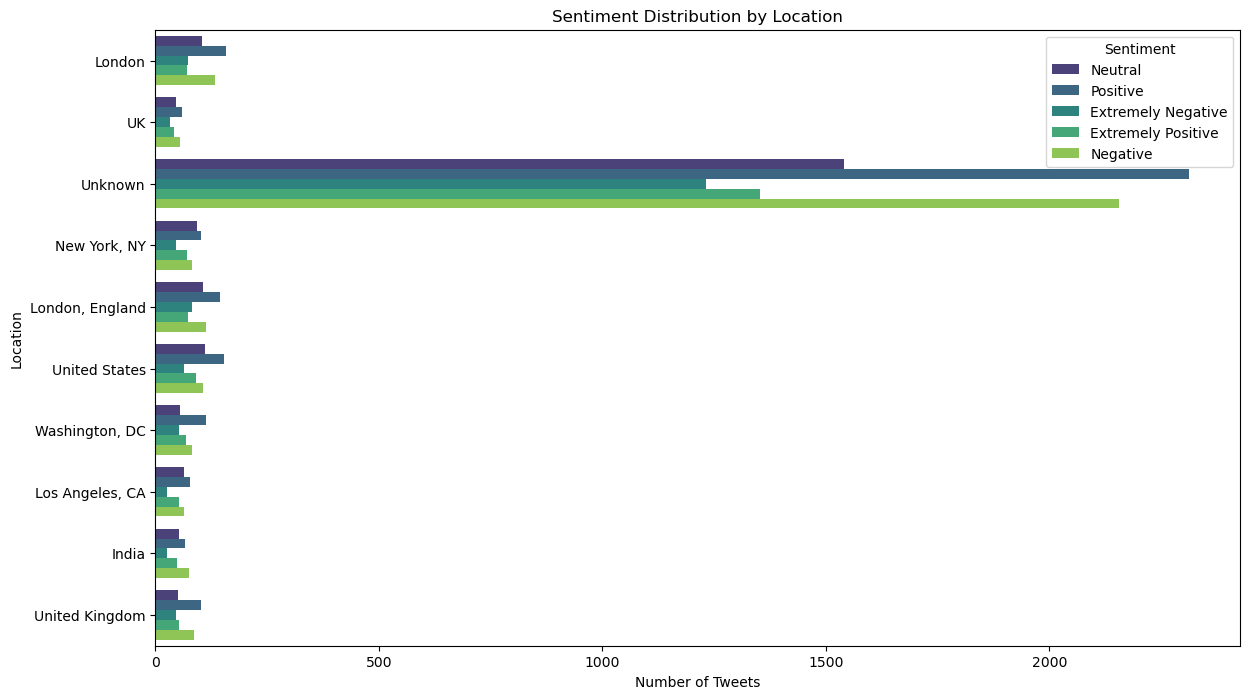

In [54]:
# Sentiment Distribution by Location (BAR PLOT)
plt.figure(figsize=(14, 8))
sns.countplot(y="Location", hue="Sentiment", data=top_location_data, palette='viridis')
plt.title('Sentiment Distribution by Location')
plt.xlabel('Number of Tweets')
plt.ylabel('Location')
plt.legend(title='Sentiment')
plt.show()

C:\Users\user\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


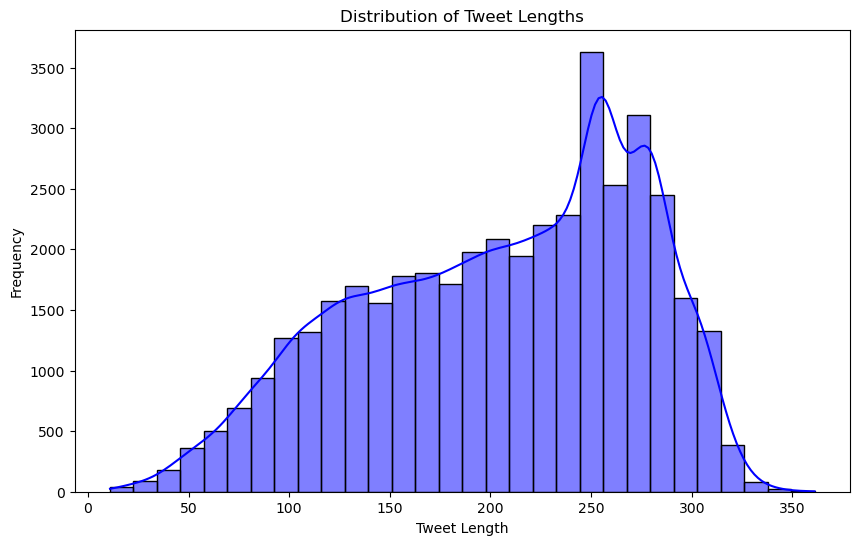

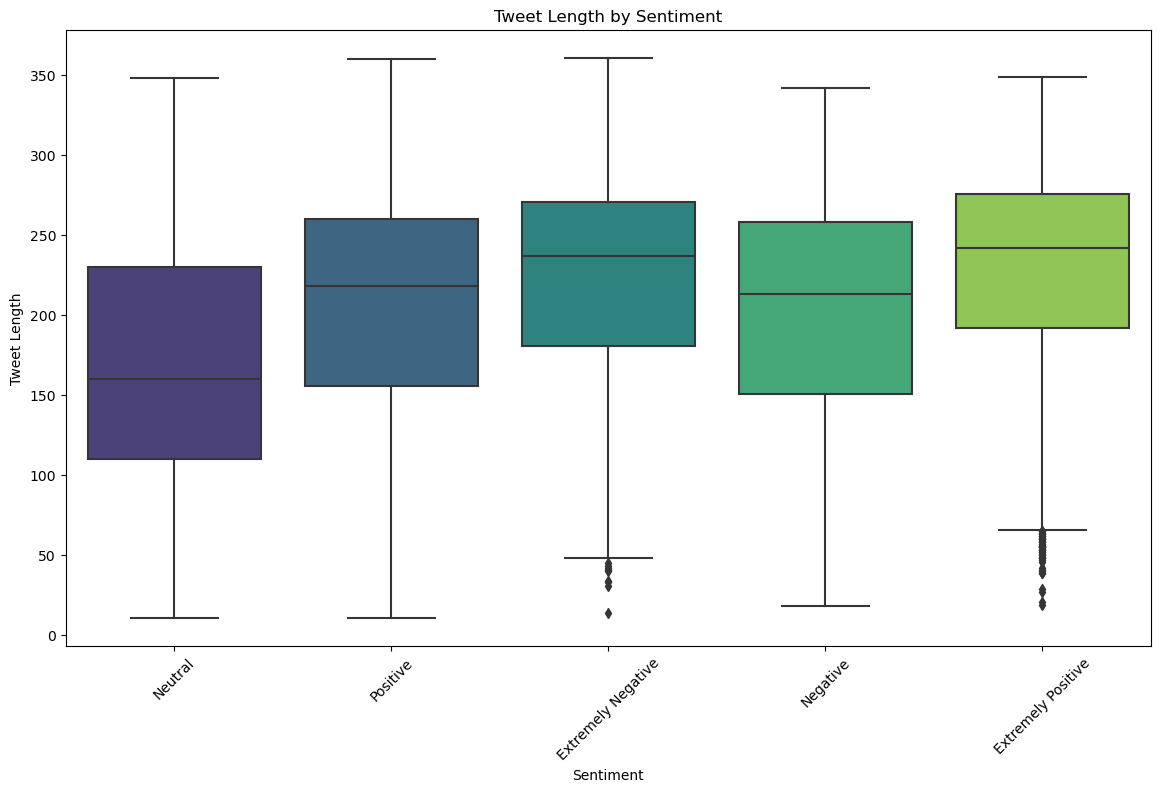

In [61]:
# Making a new column for tweet length
df['TweetLength'] = df['OriginalTweet'].apply(len)

# Histogram of Tweet Lengths
plt.figure(figsize=(10, 6))
sns.histplot(df['TweetLength'], bins=30, kde=True, color='blue')
plt.title('Distribution of Tweet Lengths')
plt.xlabel('Tweet Length')
plt.ylabel('Frequency')
plt.show()

# Box Plot of Tweet Length by Sentiment
plt.figure(figsize=(14, 8))
sns.boxplot(x='Sentiment', y='TweetLength', data=df, palette='viridis')
plt.title('Tweet Length by Sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Tweet Length')
plt.xticks(rotation=45)
plt.show()

#  this shows the behaviour of users. Like how much they write (elaborate or brief) depending upon their sentiments

In [70]:
import numpy as np

# Calculate IQR for each sentiment category
def find_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] < lower_bound) | (df[column] > upper_bound)]

# Find outliers in 'TweetLength' for each sentiment
outliers = df.groupby('Sentiment').apply(lambda x: find_outliers(x, 'TweetLength'))
outlier_indices = outliers.index.get_level_values(1)


# print(outliers[['Sentiment', 'TweetLength', 'OriginalTweet']])
outlier_indices

Index([ 6348,  6954,  9300, 15580, 19882, 24055, 25284, 31726, 37995, 38897,
        3231,  3558,  6796, 13183, 13226, 13390, 13580, 15030, 15130, 15854,
       16944, 18019, 18167, 19261, 20521, 20744, 21119, 21313, 21337, 21803,
       21804, 21882, 21986, 23339, 23391, 25793, 26378, 28268, 28701, 28802,
       29263, 29892, 30149, 30206, 30241, 30835, 31611, 33505, 33666, 37844,
       38724, 38867, 39255, 39851],
      dtype='int64')

In [65]:
df.shape

(41156, 7)

In [71]:
cleaned_data = df.drop(outlier_indices)

In [72]:
cleaned_data.shape

(41102, 7)

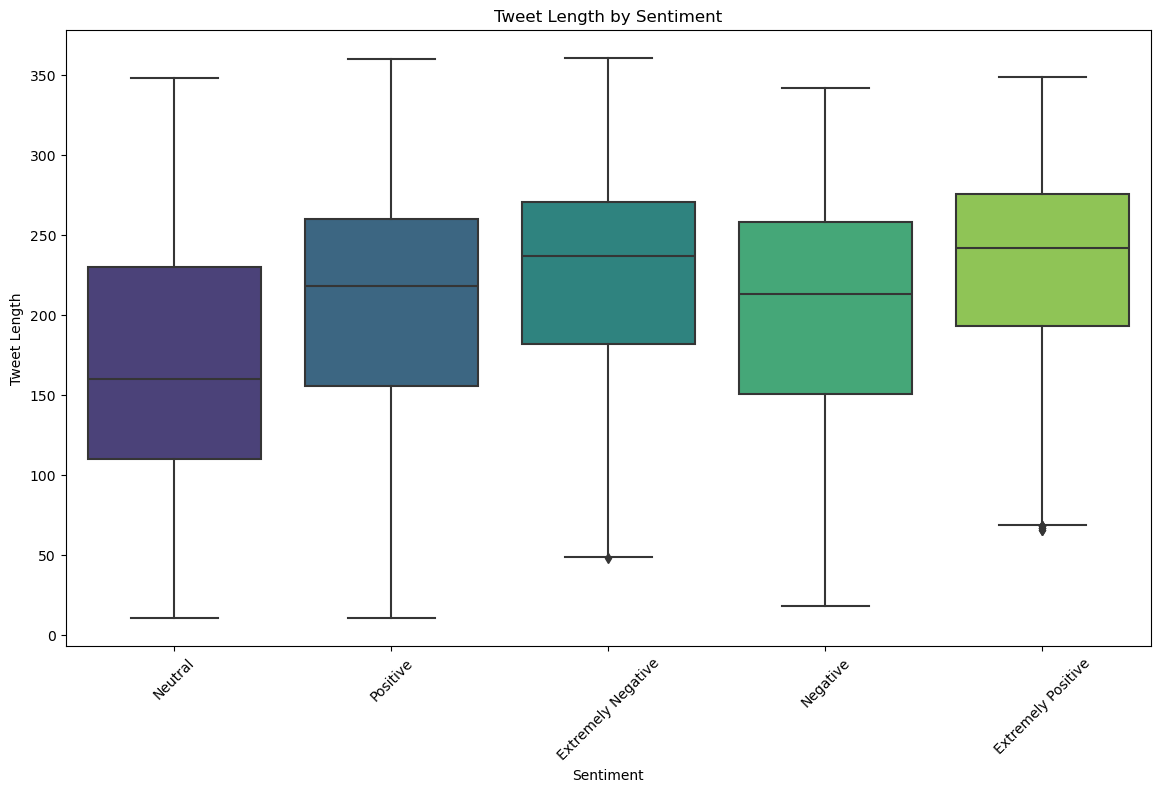

In [76]:
# again plotting boxplot for checking outliers through "cleaned_data"
plt.figure(figsize=(14, 8))
sns.boxplot(x='Sentiment', y='TweetLength', data=cleaned_data, palette='viridis')
plt.title('Tweet Length by Sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Tweet Length')
plt.xticks(rotation=45)
plt.show()

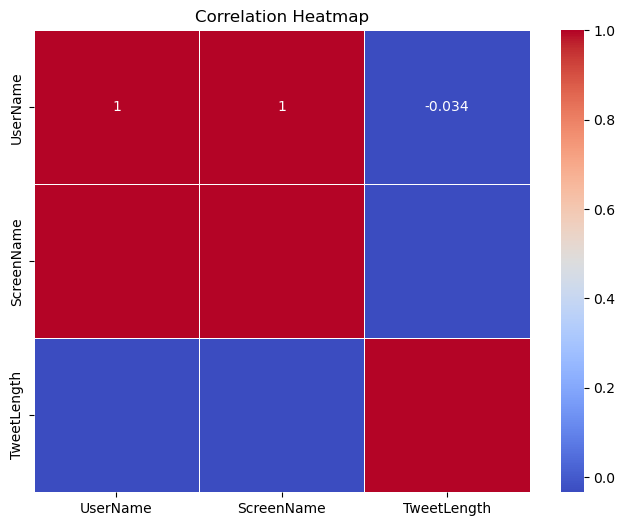

In [79]:
# Correlation matrix for numerical columns
correlation_matrix = df[['UserName', 'ScreenName', 'TweetLength']].corr()

# Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()
